In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
snmp_results_path = '../output/testing_snmp_results.csv'
column_names = ["Domain", "IP", "AuthoritativeEngineBoots", "AuthoritativeEngineTimes", "EngineID", "ScanTime"]

df = pd.read_csv(snmp_results_path, names=column_names)

df.head()

,Domain,IP,AuthoritativeEngineBoots,AuthoritativeEngineTimes,EngineID,ScanTime
0,Domain,IP,AuthoritativeEngineBoots,AuthoritativeEngineTimes,EngineID,ScanTime
1,195.43.87.140,193.227.230.1,0,2024-03-20T09:14:16+01:00,80003a8c044e4f43233031,2024-03-20T09:14:16+01:00
2,195.43.87.140,213.133.166.13,Error,Error,Error,Error
3,195.43.87.140,185.1.50.153,Error,Error,Error,Error
4,195.43.87.140,195.122.18.250,Error,Error,Error,Error


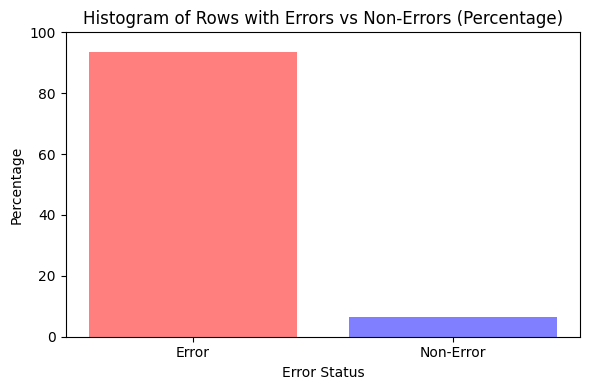

In [13]:
total_rows = len(df)

error_percentage = (df[df['AuthoritativeEngineBoots'] == 'Error'].shape[0] / total_rows) * 100
non_error_percentage = (df[df['AuthoritativeEngineBoots'] != 'Error'].shape[0] / total_rows) * 100

plt.figure(figsize=(6, 4))
plt.bar(['Error', 'Non-Error'], [error_percentage, non_error_percentage], color=['red', 'blue'], alpha=0.5)
plt.xlabel('Error Status')
plt.ylabel('Percentage')
plt.title('Histogram of Rows with Errors vs Non-Errors (Percentage)')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

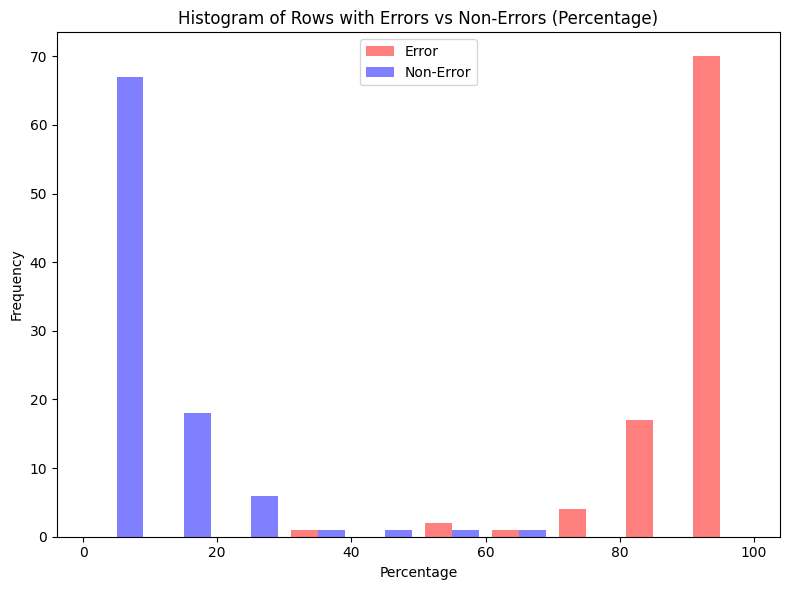

In [15]:
grouped_df = df.groupby('Domain')

# Initialize variables to count the total number of rows and the number of rows with errors
total_rows = 0
error_count = 0

# Iterate over each group
for _, group in grouped_df:
    # Remove the first and last rows for each group
    group = group.iloc[1:-1]
    
    # Increment the total number of rows
    total_rows += len(group)
    
    # Increment the number of rows with errors
    error_count += group[group['AuthoritativeEngineBoots'] == 'Error'].shape[0]

# Calculate the percentage of rows with errors
error_percentage = (error_count / total_rows) * 100
non_error_percentage = 100 - error_percentage

# Plot histograms
plt.figure(figsize=(6, 4))
plt.bar(['Error', 'Non-Error'], [error_percentage, non_error_percentage], color=['red', 'blue'], alpha=0.5)
plt.xlabel('Error Status')
plt.ylabel('Percentage')
plt.title('Histogram of Rows with Errors vs Non-Errors (Percentage)')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()